## IDS/ACM/CS 158: Fundamentals of Statistical Learning
### PS4, Problem 2b: Decision Boundary of the Bayes Classifier
> Name: Li, Michael
 
> Email address: mlli@caltech.edu

Notes:
Please use python 3.6

You are required to properly comment and organize your code.

* Helper functions (add/remove part label according to the specific question requirements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

* <b>Part b</b>

In [2]:
# define our constants
p = 2
n = 100
us = [
    [-2, 0],
    [-1, 1],
    [0, 2],
    [1, 1],
    [2, 0]
]

vs = [
    [0, 1],
    [-1, 0],
    [0, 0],
    [1, 0],
    [0, -1]
]

ss = [.01, .1, 1]

In [3]:
def boundary(x, s, us, vs):
    """
    x - candidate point for boundary point
    s - scalar for variance
    us - list of mean vectors for class 0
    vs - list of mean vectors for class 1
    
    returns the derived quantity from part 2a
    """
    class_1_sum = 0
    class_0_sum = 0
    
    for i in range(len(us)):
        class_0_sum += np.exp(-1/(2*s) * ((x[0]-us[i][0])**2 + (x[1]-us[i][1])**2))
        class_1_sum += np.exp(-1/(2*s) * ((x[0]-vs[i][0])**2 + (x[1]-vs[i][1])**2))

    return class_1_sum - class_0_sum

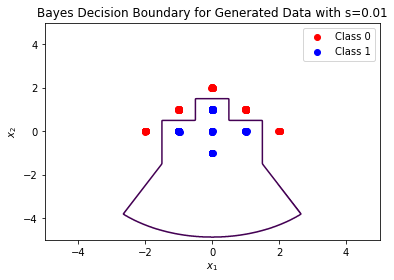

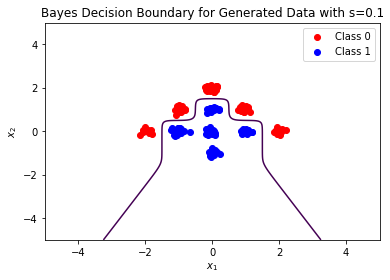

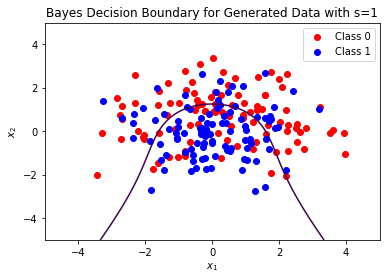

In [4]:
for s in ss:
    class_0 = []
    class_1 = []
    
    for i in range(n):
        # for each point we randomly pick a mean vector
        rand_u = us[np.random.choice(len(us))]
        rand_v = vs[np.random.choice(len(vs))]
        
        # generate random point with randomly seleted mean and variance sI_p
        class_0.append(np.random.normal(rand_u, s))
        class_1.append(np.random.normal(rand_v, s))
    
    # get the points for the boundary
    class_0 = np.array(class_0)
    class_1 = np.array(class_1)

    x_array = np.arange(-5, 5.01, 0.01)
    y_array = np.arange(-5, 5.01, 0.01)
    X,Y = np.meshgrid(x_array, y_array)
    Z = np.ndarray((1001, 1001))

    for i in range(1001):
        for j in range(1001):
            Z[i][j] = boundary([X[i][j], Y[i][j]], s, us, vs)
    
    plt.contour(X, Y, Z, [0])
    plt.scatter(class_0[:,0], class_0[:,1], c='red', label='Class 0')
    plt.scatter(class_1[:,0], class_1[:,1], c='blue', label='Class 1')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Bayes Decision Boundary for Generated Data with s={}'.format(s))
    plt.legend()
    plt.show()